<a href="https://colab.research.google.com/github/Nohyunsun/yunsun/blob/main/%EC%98%81%ED%99%94%EB%8C%80%EB%B3%B8_%EC%9D%B8%EB%AC%BC%EA%B0%90%EC%A0%95%EB%B6%84%EC%84%9D_2019218031_%EB%85%B8%EC%9C%A4%EC%84%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *2019218031_컴퓨터학부 _ 노윤선*

< HARRY POTTER SCRIPT EMOTION ANALYSIS >
- 해리포터의 시리즈 중 '마법사의 돌' 의 인물들 간의 감정분석 및 변화를 이야기 하고자 이주제를 선정하게 되었다. 감정분석은 굉장히 다양하고 광범위하다고 생각한다. 때문에 그 다양성을 바탕으로 더 흥미로운 주제를 찾다 보니 인물들간의 대화를 통한 그들의 감정을 분석하고 싶다는 생각이 들었고 , 해리포터라는 주제로 이를 시도해보게 되었다.



데이터셋 링크 : https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text

참조 모델 : https://www.kaggle.com/code/mohamedabdelmohsen/emotion-analysis-and-classification-using-lstm-93

-> 참조 모델 : 거의 사용 x (하단부에 모델 설명 적어놓았습니다!)

 -  교수님 대본 파일은 따로 LMS 과제란에 올렸습니다.

#Importing libraries#

- Python 패키지 설치위한 명령어

  -> tensorflow : 딥러닝 모델 구축

  -> numpy : 수치 연산

  -> pandas : 데이터 조작 & 분석

  -> matplotlib : 데이터 시각화(그래프&차트)

  -> nltk : 자연어 처리 위한 파이썬 라이브러리

In [ ]:
!pip install tensorflow numpy pandas matplotlib nltk sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=df29540620b1bc7246ff0b0f2a3ff8dd218337bb1a26a3638f8a054d6743b15e
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


- tensorflow 라이브러리 설치하는 명령어

 -> 자연어 처리 등 활용

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- lime 라이브러리 설치하는 명령어

 -> 모델의 해석 가능성 향상 위함

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=f3c922921c3fc62eb682ad68759c1c7a0ee4ca8879388724711ac154661f2c88
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


- NLTK 라이브러리 설치

 -> 텍스트 데이터의 전처리, 형태소 분석, 품사 태깅, 문장 토큰화 , 단어 빈도 분석 등의 자연어 처리 작업 지원

In [ ]:
!pip install pandas tensorflow nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- keras 라이브러리 설치

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- nltk 라이브러리 설치

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- pdf 파일을 다루기 위한 라이브러리

  -> 내가 업로드할  대본 파일 확장자 : .pdf

In [ ]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
import nltk

In [ ]:
import PyPDF2

In [ ]:
import lime

- stopwords : 자연어 처리에서 일반적으로 무시되는 단어들의 목록

 -> 이는 불필요한 단어들을 제거하거나 무시하여 효율적인 분석을 수행할 수 있다.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

- tensorflow 버전 확인

  -> 결과 : 2.12.0 버전
  (주요버전 : 2, 부 버전 : 12, 패치 버전 : 0)

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.12.0


#대본 파일(.pdf) 업로드#
  -> harrypotter_script 업로드

In [ ]:
#과제 제출시 작성
from google.colab import files

#대본 파일 업로드
uploaded = files.upload()

# 업로드한 파일의 공개 링크 생성
file_name = list(uploaded.keys())[0]  # 업로드한 파일 중 첫 번째 파일
file_link = f'https://app.studiobinder.com/company/580e85847e7982164664e844/collab/61293670dc57624a8f116dbe/projects/612655e0a250f604a0730995/document/612655f21540cc046af45891?utm_source=script&utm_medium=post&utm_campaign=sb-app-link&utm_id=blog&utm_term=harry-potter-script-teardown&utm_content=full-script-pdf-download={uploaded[file_name]}'

print('대본 파일 링크:', file_link)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



- pdf 파일에서 텍스트 추출

In [ ]:
from PyPDF2 import PdfReader

file_path = 'harrypotter_script.pdf'  # 파일 경로를 정확하게 지정

# 지정한 파일 경로를 바탕으로 pdf 파일을 바이너리 모드로 열기
# with 문 사용으로 파일을 자동으로 닫아줌
with open(file_path, 'rb') as file:
    pdf_reader = PdfReader(file) # pdf 파일 읽기

    대본 = ''  # 추출한 텍스트를 저장할 빈 문자열 변수 '대본' 을 초기화
    for page in pdf_reader.pages:  # pdf_reader의 pages 속성을 순회하면서 각 페이지에 접근
        text = page.extract_text()
        대본 += text.encode('utf-8').decode('utf-8', 'ignore') # 각 페이지의 텍스트를 추출해서 '대본'변수에 추가

print(대본)  # 추출된 전체 텍스트(대본) 출력

1.
Generated on May 6, 2023EXT. PRIVET DRIVE - NIGHT 1 1
Dark at this hour, except for the STREET LAMPS that dot the 
street, spilling deep pools of light upon the ground.
On the far corner, a MAN MATERIALIZES out of the darkness. 
He is tall and thin, with a silver beard long enough to 
tuck into his belt. He wears a PURPLE CLOAK and is roughly 
one hundred and fifty years old. He is ALBUS DUMBLEDORE.
Dumbledore removes a small silver object from his cloak—the 
PUT-OUTER. He extends his hand and—CLICK—the nearest street 
lamp GOES OUT with a soft pop. He continues to click the 
Put-Outer until all the lamps go DARK.
He turns, spies a CAT, sitting on the wall of Number Four. 
He smiles knowingly.
DUMBLEDORE
I should have known you'd be here,
Professor McGonagall.
The cat leaps forward, TRANSFIGURES itself into a rather 
severe-looking woman in an EMERALD CLOAK.
PROFESSOR MCGONAGALL
Are the rumors true, Albus?
DUMBLEDORE
(smile fading)
I'm afraid so. The good. And the
bad.
PROFESSOR MCG

- ntlk 모듈 사용해서 punkt 데이터 다운로드

In [ ]:
import nltk   # NLTK 라이브러리 임포트

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

- VADER는 NLTK에서 제공하는 감성 분석 도구
  -> 긍정, 부정, 중립

In [ ]:
import nltk

nltk.download('vader_lexicon') # VADER 감성 사전

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

- 다양한 라이브러리와 모듈 임포트 하는 과정

 -> 코드가 성공적으로 다운로드 되어 데이터 사용해서 자연어 처리 작업 수행 가능하다.

In [ ]:
import re           # 문자열에서 패턴을 검색하거나 대체하는 등의 작업
import nltk         # 자연어 처리 위한 라이브러리
import string       # 문자열 처리 위한 모듈
import numpy as np  # 수치 계산 위한 라이브러리
import pandas as pd # 데이터 조작과 분석을 위한 라이브러리
import seaborn as sns # 시각화 라이브러리
import matplotlib.pyplot as plt # 다양한 종류의 그래프를 그리는 함수들을 제공한다.
from nltk.corpus import stopwords # NLTK 에서 제공되는 다양한 말뭉치 데이터 제어
from nltk.stem import SnowballStemmer, WordNetLemmatizer  # 단어의 형태소 추출 혹은 원형 복원 등 수행
from sklearn.feature_extraction.text import TfidfVectorizer # 머신러닝과 데이터 분석 위한 라이브러리

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras import utils  # Tensorflow 라이브러리의 API인 keras 사용 위한 모듈
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

#nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()

# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC

#Lime
# 머신러닝 모델의 예측 결과를 해석하는데 사용되는 패키지
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from lime.lime_text import IndexedString,IndexedCharacters
from lime.lime_base import LimeBase
from lime.lime_text import explanation
sns.set(font_scale=1.3)
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#대본 전처리#

  - 전처리 된 대본은 특수문자가 제거되고 소문자로 변환되며, 영어의 불용어가 제거된 형태로 출력된다.

In [ ]:
from nltk import sent_tokenize
import re
from nltk.corpus import stopwords

# 대본을 문장 단위로 분할
sentences = sent_tokenize(대본)

# 특수 문자 제거와 소문자 변환을 포함한 전처리
cleaned_sentences = [re.sub('[^A-Za-z0-9가-힣\s]+', '', sentence.lower()) for sentence in sentences]

# 불용어 제거
stop_words = set(stopwords.words('english'))
preprocessed_sentences = [[word for word in sentence.split() if word not in stop_words] for sentence in cleaned_sentences]

# 전처리된 대본 출력
for sentence in preprocessed_sentences:
    print(sentence)

['1']
['generated', 'may', '6', '2023ext']
['privet', 'drive', 'night', '1', '1', 'dark', 'hour', 'except', 'street', 'lamps', 'dot', 'street', 'spilling', 'deep', 'pools', 'light', 'upon', 'ground']
['far', 'corner', 'man', 'materializes', 'darkness']
['tall', 'thin', 'silver', 'beard', 'long', 'enough', 'tuck', 'belt']
['wears', 'purple', 'cloak', 'roughly', 'one', 'hundred', 'fifty', 'years', 'old']
['albus', 'dumbledore']
['dumbledore', 'removes', 'small', 'silver', 'object', 'cloakthe', 'putouter']
['extends', 'hand', 'andclickthe', 'nearest', 'street', 'lamp', 'goes', 'soft', 'pop']
['continues', 'click', 'putouter', 'lamps', 'go', 'dark']
['turns', 'spies', 'cat', 'sitting', 'wall', 'number', 'four']
['smiles', 'knowingly']
['dumbledore', 'known', 'youd', 'professor', 'mcgonagall']
['cat', 'leaps', 'forward', 'transfigures', 'rather', 'severelooking', 'woman', 'emerald', 'cloak']
['professor', 'mcgonagall', 'rumors', 'true', 'albus']
['dumbledore', 'smile', 'fading', 'im', 'afra

 위의 코드는 대본을 문장 단위로 분할, 특수 문장 제거, 소문자 변환 후 불용어 제거


#데이터 로드(데이터셋 업로드)#

In [ ]:
#과제 제출시 작성
#tweet_emotions 데이터셋 업로드
from google.colab import files
uploaded = files.upload()

Saving tweet_emotions.csv to tweet_emotions.csv


- read_csv() 함수 사용해서 데이터 프레임으로 읽어오는 과정

In [ ]:
import pandas as pd
data = pd.read_csv('tweet_emotions.csv')

- 파일 존재 여부 확인

In [ ]:
import os

dataset_path = 'tweet_emotions.csv'

if os.path.exists(dataset_path):
    print("데이터셋 파일이 존재합니다.")
else:
    print("데이터셋 파일이 존재하지 않습니다.")

데이터셋 파일이 존재합니다.


In [ ]:
# 데이터셋 읽기
import pandas as pd

df_train = pd.read_csv('tweet_emotions.csv')

In [ ]:
# CSV 파일 로드
data = pd.read_csv(dataset_path)

In [ ]:
# print first 5 rows
# 데이터 확인
df_train.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


- column 마다 고유값 확인

In [ ]:
data['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [ ]:
data['tweet_id'].unique()

array([1956967341, 1956967666, 1956967696, ..., 1753919005, 1753919043,
       1753919049])

In [ ]:
data['content'].unique() # 결과가 content 열에 다양한 텍스트 데이터가 포함되어 있는 것으로 보아 정상적인 결과로 출력되었음.

array(['@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[',
       'Layin n bed with a headache  ughhhh...waitin on your call...',
       'Funeral ceremony...gloomy friday...', ...,
       "Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!",
       '@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!',
       '@mopedronin bullet train from tokyo    the gf and i have been visiting japan since thursday  vacation/sightseeing    gaijin godzilla'],
      dtype=object)

- 값의 분포 확인(column)

In [ ]:
data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [ ]:
data['tweet_id'].value_counts()

1956967341    1
1695478035    1
1695477627    1
1695477640    1
1695477692    1
             ..
1963996234    1
1963996702    1
1963997248    1
1963997588    1
1753919049    1
Name: tweet_id, Length: 40000, dtype: int64

In [ ]:
data['content'].value_counts()

I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9                            14
FREE UNLIMITED RINGTONES!!! - http://tinyurl.com/freeringring - USA ONLY - Awesome 4 iphone                                             13
Happy Mother's Day!                                                                                                                     10
Happy Mothers Day                                                                                                                       10
happy mother's day                                                                                                                       8
                                                                                                                                        ..
Sick daddy  send prayer his way                                                                                                          1
Laura's gone for the weeken

In [ ]:
#print the shape of the data set
print(df_train.shape)

(40000, 3)


#데이터 전처리#

In [ ]:
!pip install pandas

import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(data.columns)

Index(['tweet_id', 'sentiment', 'content'], dtype='object')


- sentiment 열에 결측치 존재하므로 확인 필요

   -> 데이터셋 전처리 과정에서 감정레이블 : nan 발생

-> 그러나 감정레이블 : nan 이 결측치의 문제가 아님을 알게 됨

- 결측치 삭제

In [ ]:
data.dropna(inplace=True)

In [ ]:
# 감정 레이블이 "nan"인 행 찾기
nan_rows = data[data['sentiment'] == 'nan']

In [ ]:
# 'sentiment' 열의 결측치 확인
missing_values = data['sentiment'].isnull().sum()
print("결측치 수:", missing_values)

결측치 수: 0


- 아래의 코드는 fillna() 함수를 이용해서 'sentiment' 열의 결측치를 Unknown 으로 대체했다.

In [ ]:
# 결측치 확인
missing_values = data.isnull().sum()
print(missing_values)

# 결측치 처리
data['sentiment'].fillna('Unknown', inplace=True)
data['content'].fillna('Unknown', inplace=True)

# 결측치 처리 후 확인
missing_values_after = data.isnull().sum()
print(missing_values_after)

tweet_id     0
sentiment    0
content      0
dtype: int64
tweet_id     0
sentiment    0
content      0
dtype: int64


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 텍스트 전처리 함수
def preprocess_text(text):
    # 소문자 변환
    text = text.lower()
    # 특수문자 제거
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# 텍스트 전처리
data['content'] = data['content'].apply(preprocess_text)

# 불용어 제거
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['content'] = data['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# 토큰화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['content'])
sequences = tokenizer.texts_to_sequences(data['content'])

# 시퀀스 패딩
max_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# 감정 레이블 정수 인코딩
labels = data['sentiment'].map({'neutral': 0, 'worry':1, 'happiness': 2, 'sadness': 4,
                                'love': 5, 'surprise': 6, 'fun': 7, 'relief': 8,
                                'hate': 9, 'empty': 10, 'enthusisam': 11, 'boredom': 12,
                                'anger': 13})

# 전처리된 데이터 확인
print('전처리된 데이터 예시:')
print('텍스트 시퀀스:', sequences[0])
print('패딩된 시퀀스:', padded_sequences[0])
print('감정 레이블:', labels[0])
#print(labels.head())

# 전처리 과정을 거친 후의 입력 특성 데이터를 X_train으로 설정
X_train = padded_sequences

# 레이블 데이터를 y_train으로 설정
y_train = labels

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


전처리된 데이터 예시:
텍스트 시퀀스: [14786, 18, 3004, 55, 4955, 696, 473, 991, 411]
패딩된 시퀀스: [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0 14786    18  3004    55  4955   696   473   991
   411]
감정 레이블: 10.0


-> 위의 결과에서 감정 레이블 : nan 발생(현재 오류 수정 완료)

1) 결측치의 문제

2) 데이터 로드의 문제

3) 전처리의 문제

-> 그러나 감정레이블 : nan 이 출력되었던 이유는 감정 레이블 정수 인코딩의 오류가 문제였다

 - (대본추가) 감정 분석

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from PyPDF2 import PdfReader

#데이터셋 불러오기
data = pd.read_csv('tweet_emotions.csv')  # tweet_emotions 파일에서 데이터셋 읽어와서 data 변수에 저장

#대본 불러오기
file_path = 'harrypotter_script.pdf'      # 대본 pdf 파일의 경로 지정

with open(file_path, 'rb') as file:       # pdf 파일을 바이너리 읽기 모드로 연다.
    pdf_reader = PdfReader(file)          # PdfReader 객체 생성하여 pdf 파일 읽기
    num_pages = len(pdf_reader.pages)     # pdf 파일의 총 페이지 수 가져오기

    대본 = ''                             # 빈 문자열로 초기화
    for page in pdf_reader.pages:         # 각 페이지 반복
        대본 += page.extract_text()       # 각 페이지의 텍스트 추출하여 '대본' 변수에 추가

#감정 분석을 위한 초기화
analyzer = SentimentIntensityAnalyzer()

#감정 분석 수행
감정분석결과 = analyzer.polarity_scores(대본)

#결과 출력
print(감정분석결과)

{'neg': 0.09, 'neu': 0.81, 'pos': 0.1, 'compound': 0.9998}


 - 대본 감정 분석 결과

  -> neg(부정적감정) : 0.09(0에 가까울수록 부정적 감정이 적음)

  -> neu(중립적감정) : 0.81(1에 가까울수록
  중립적인 감정이다.

  -> pos(긍정적감정) : 0.1(0에 가까울 수록 긍정적인 감정이 적다.

  -> compound(종합 감정 점수) : 0.9998(범위는 -1에서 1까지이며 1에 가까울수록 매우 긍정적이고, -1에 가까울 수록 매우 부정적이다.

  => 결과 : 대본에 포함된 텍스트의 감정성질이 중립적인것으로 나타났으며, 전체적으로 긍정적인 감정의 정도가 부정적인 감정의 정도보다 조금 더 높은 것으로 나타난다. 또한 종합적인 감정 점수인 'compound'값은 매우 긍정적인 값을 가지고 있으며, 이는 대본 전체적으로 매우 긍정적인 감정을 가지고 있음을 알 수있었다.

#Assessing#

> Train dataset



In [ ]:
# check if the data is balanced or not
# 데이터 균형 확인 위함
df_train.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [ ]:
#check if the data is balanced or not
# 데이터셋 감정 카테고리 분포 확인 , 백분율로 계산
df_train.sentiment.value_counts() / df_train.shape[0] *100

neutral       21.5950
worry         21.1475
happiness     13.0225
sadness       12.9125
love           9.6050
surprise       5.4675
fun            4.4400
relief         3.8150
hate           3.3075
empty          2.0675
enthusiasm     1.8975
boredom        0.4475
anger          0.2750
Name: sentiment, dtype: float64

- countplot 함수 사용해서 df_train 데이터프레임에서 sentiment 열의 기준으로 감정 분포 시각화

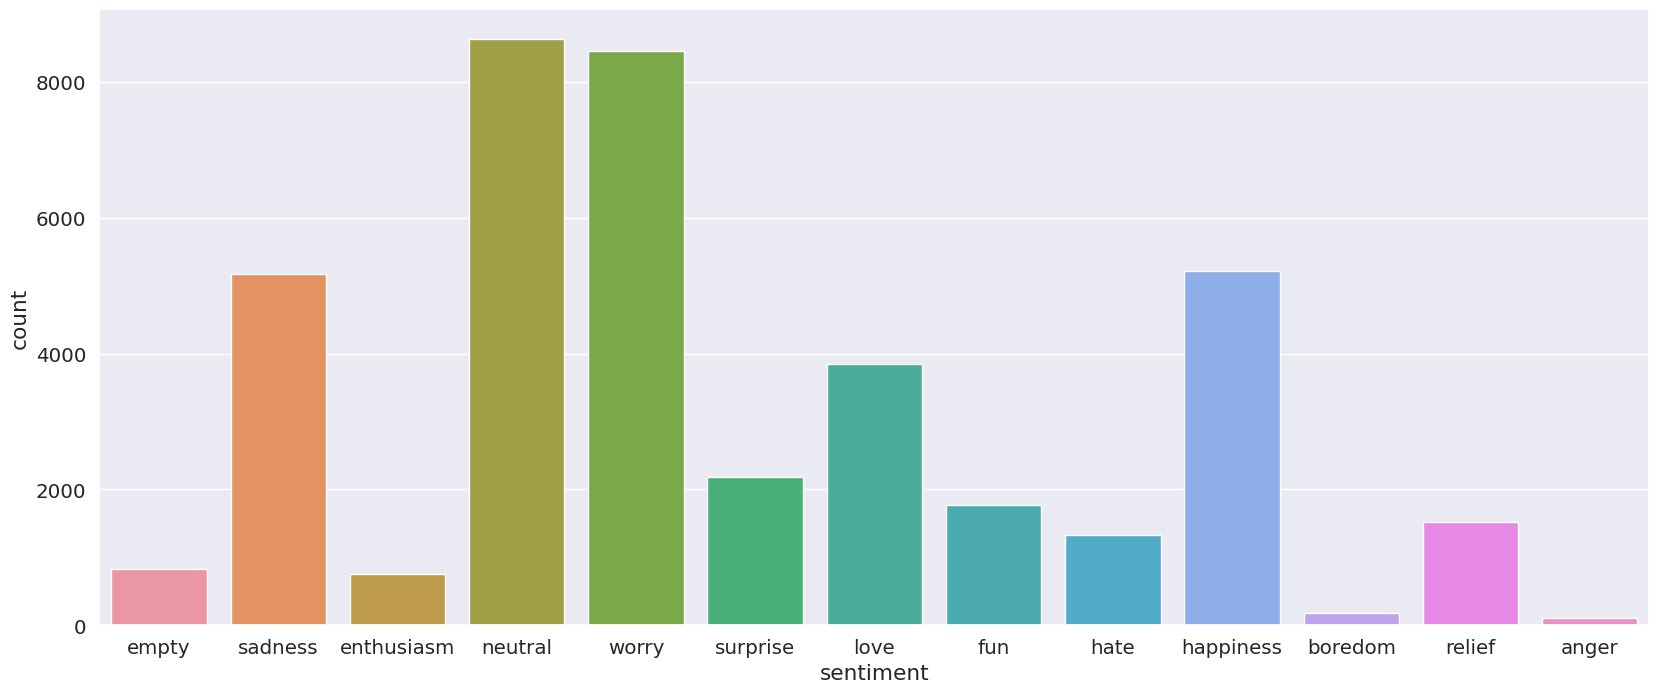

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x='sentiment', data=df_train);

In [ ]:
#print the rows which are duplicated (duplicated in the text but with different emotions)
#content 열의 값이 중복된 행을 찾는 코드
df_train[df_train['content'].duplicated() == True]

,tweet_id,sentiment,content
366,1957048870,worry,I feel so deflated. No more doggy.
521,1957088574,worry,Somebody please save the polar bears!
1026,1957198430,neutral,I'm at work
3684,1958103183,sadness,@dublins98dave me too! I am down 400 euro
4363,1960336689,worry,"is upset, I left my phone at home again"
...,...,...,...
39859,1753886681,love,Happy Mothers Day
39898,1753902524,love,happy mothers day!
39913,1753902827,happiness,happy mother's day!
39915,1753903008,love,happy mother's day everyone


In [ ]:
#removing duplicated values
index = df_train[df_train.duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [ ]:
#print the number of duplicated values 데이터 구조 - 중복 확인
df_train.duplicated().sum()

0

In [ ]:
#print some of those rows to check
df_train[df_train['content'] == df_train.iloc[7623]['content']]

,tweet_id,sentiment,content
7623,1961817193,neutral,@TrudieDreyer I can't DM you because you aren'...


- 전처리 이후의 데이터 프레임의 크기 확인

In [ ]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('tweet_emotions.csv')

# 행과 열의 수 출력
num_rows = len(data)
num_cols = len(data.columns)
print("데이터프레임의 행 개수:", num_rows)
print("데이터프레임의 열 개수:", num_cols)

데이터프레임의 행 개수: 40000
데이터프레임의 열 개수: 3


In [ ]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('tweet_emotions.csv')

# 인덱스 값 출력
index_values = data.index.values
print("데이터프레임의 인덱스 값:", index_values)

데이터프레임의 인덱스 값: [    0     1     2 ... 39997 39998 39999]


In [ ]:
#print some of those rows to check
df_train[df_train['content'] == df_train.iloc[7623]['content']]

,tweet_id,sentiment,content
7623,1961817193,neutral,@TrudieDreyer I can't DM you because you aren'...


In [ ]:
df_train[df_train['content'] == df_train.iloc[9088]['content']]

,tweet_id,sentiment,content
9088,1962414293,sadness,"@unmarketing Fun idea. But, if we saw how clot..."


- 데이터셋 정리

In [ ]:
#중복 텍스트 제거 하는 작업
#removing duplicated text
index = df_train[df_train['content'].duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [ ]:
#불용어 개수 세는 작업 - NLTK 사용
#Count the number of stopwords in the data
temp =df_train.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['content'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

2     5471
3     5400
4     4890
1     4638
5     4260
6     3671
0     3548
7     2774
8     2057
9     1394
10     914
11     420
12     230
13     119
14      31
15       6
17       2
16       2
Name: stop_words, dtype: int64

<Axes: ylabel='Frequency'>

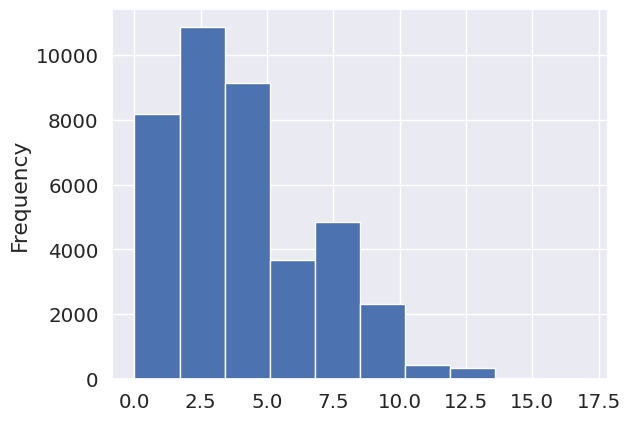

In [ ]:
#불용어 분포 시각적 확인
#distribution of stopwords visually
temp['stop_words'].plot(kind= 'hist')

# 모델 훈련 #

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from PyPDF2 import PdfReader
from sklearn.model_selection import train_test_split

# PDF 파일 경로
file_path = 'harrypotter_script.pdf'

# PDF 파일 열기
with open(file_path, 'rb') as file:
    pdf_reader = PdfReader(file)

    # 대본 텍스트 추출
    대본 = ''
    for page in pdf_reader.pages:
        대본 += page.extract_text()

# VADER 감성 분석 모델 로드
sia = SentimentIntensityAnalyzer()

# 대사를 감정 점수로 변환
sentiment_scores = []
for dialogue in 대본.split('\n'):
    sentiment_scores.append(sia.polarity_scores(dialogue)['compound'])

# 데이터셋 준비
dataset = pd.DataFrame({'Dialogue': 대본.split('\n'), 'SentimentScore': sentiment_scores})
X = dataset['SentimentScore'].values.reshape(-1, 1)  # 입력 특성
y = dataset['SentimentScore'].values  # 분류 레이블

# NaN 값 대체
mean_score = dataset['SentimentScore'].mean()
dataset['SentimentScore'] = dataset['SentimentScore'].fillna(mean_score)

# 데이터셋 재정의
X = dataset['SentimentScore'].values.reshape(-1, 1)  # 입력 특성
y = dataset['SentimentScore'].values  # 분류 레이블

# 임계값 설정
threshold = 0.0

# 이진 분류 레이블 생성
binary_labels = [1 if score >= threshold else 0 for score in y]

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, binary_labels, test_size=0.2, random_state=42)

# 모델 초기화
model = LogisticRegression()

# 모델 훈련
model.fit(X, binary_labels)

LogisticRegression()

> 위의 코드는 Logistic Regression 모델을 사용하여 감성 분류 작업을 수행한다. 감성 분류는 텍스트의 감정을 예측하는 작업으로, 각 대사의 감정 점수를 입력으로 사용하여 이진 분류를 수행하는 방식으로 진행해 보았다.

-> 구체적인 과정 설명.
1. PDF 파일을 열고 대본 텍스트를 추출한다.

2. VADER (Valence Aware Dictionary and sEntiment Reasoner) 감성 분석 모델을 로드한다. VADER는 Lexicon 기반의 감성 분석 모델로, 문장의 감정 점수를 산출하는 데 사용된다.

3. 대사를 문장 단위로 분리하고 각 문장에 대해 VADER 모델을 적용하여 감정 점수를 계산한다.

4. 데이터셋을 준비한 후. 대사와 감정 점수를 포함하는 데이터프레임을 생성하고, 입력 특성과 분류 레이블로 분리한다.

5. NaN 값을 평균 점수로 대체한다.

6. 데이터셋을 재정의하고, 임계값을 기준으로 이진 분류를 위한 레이블을 생성한다.

7. 데이터셋을 학습 데이터와 테스트 데이터로 분리한다.

8. Logistic Regression 모델을 초기화한다.

9. 학습 데이터를 사용하여 모델을 훈련한다.

# 감정분석 결과(시각화)#

In [ ]:
# 감정 분석 예측
prediction = model.predict(X)

# 감정 점수 계산
sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
for pred in prediction:
    if pred == 0:
        sentiment_scores['neg'] += 1
    else:
        sentiment_scores['pos'] += 1

# 감정 점수 정규화
total = sentiment_scores['neg'] + sentiment_scores['pos']
sentiment_scores['neg'] /= total
sentiment_scores['pos'] /= total
sentiment_scores['neu'] = 1 - sentiment_scores['neg'] - sentiment_scores['pos']
sentiment_scores['compound'] = sentiment_scores['pos'] - sentiment_scores['neg']

# 결과 출력
print(sentiment_scores)

{'neg': 0.10537363560033586, 'neu': 0.0, 'pos': 0.8946263643996641, 'compound': 0.7892527287993283}


- 각 인물별 대사 추출해서 character_dialogues 딕셔너리에 저장

In [ ]:
character_dialogues = {
    'Harry': [],
    'Ron': [],
    'Hermione': [],
    'Dumbledore' : [],
    'Hagrid': [],
    'Dudley': [],
    'Snape': [],
    'Malfoy':[],
    'Quirrell': []
}

for line in 대본.split('\n'):
    if 'Harry' in line:
        character_dialogues['Harry'].append(line)
    elif 'Ron' in line:
        character_dialogues['Ron'].append(line)
    elif 'Hermione' in line:
        character_dialogues['Hermione'].append(line)
    elif 'Dumbledore' in line:
        character_dialogues['Dumbledore'].append(line)
    elif 'Hagrid' in line:
        character_dialogues['Hagrid'].append(line)
    elif 'Dudley' in line:
        character_dialogues['Dudley'].append(line)
    elif 'Snape' in line:
        character_dialogues['Snape'].append(line)
    elif 'Malfoy' in line:
        character_dialogues['Malfoy'].append(line)
    elif 'Quirrell' in line:
        character_dialogues['Quirrell'].append(line)

- character_dialogues딕셔너리의 구성 확인

In [ ]:
print(character_dialogues)

{'Harry': ['Good luck, Harry Potter.', "the joists above Harry's head. Calmly, Harry takes a pair ", 'Harry comes blinking out the cupboard door, watches his ', "then, Harry's Aunt Petunia appears in the kitchen ahead.", '(scowling at Harry)', 'Generated on May 6, 2023Harry enters, finds his UNCLE VERNON reading the Daily Mail ', 'Aunt Petunia cuffs Harry on the head on her way to the ', 'As Dudleyrtosses the damaged soldier aside, Harry studies ', 'As Aunt Petunia cuddles him, Dudley shoots Harry a nasty ', 'As Harry gets in the car, Uncle Vernon leans close.', 'Dudley waddles away and the others follow, all but Harry, ', 'The snake nods. Harry stops, looks off, then back. ', 'The snake regards Harry...then slowly shakes its head no. ', 'Harry nods, looking a bit unnerved.', 'Dudley JABS Harry hard in the ribs, sending him tumbling to ', 'the concrete, floor. Angry, Harry looks up as Dudley leans ', 'Stunned, Harry watches the python slip into the sunshine, ', 'Uncle Vernon, face purp

- 대본 데이터셋에서 인물별 감정 분석

<ipython-input-59-ae07edb5c8f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Character': character,
<ipython-input-59-ae07edb5c8f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Character': character,
<ipython-input-59-ae07edb5c8f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Character': character,
<ipython-input-59-ae07edb5c8f2>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Character': character,
<ipython-input-59-ae07edb5c8f2>:27: FutureWarning: The frame.append method is deprecated and will be

    Character  Positive  Negative  Neutral  Compound
0       Harry     0.088     0.076    0.836    0.9973
1         Ron     0.088     0.083    0.828    0.6836
2    Hermione     0.076     0.071    0.854    0.6637
3  Dumbledore     0.056     0.023    0.921    0.8456
4      Hagrid     0.051     0.077    0.872   -0.9448
5      Dudley     0.000     0.091    0.909   -0.9286
6       Snape     0.050     0.143    0.807   -0.9773
7      Malfoy     0.064     0.134    0.801   -0.9432
8    Quirrell     0.045     0.115    0.839   -0.9205


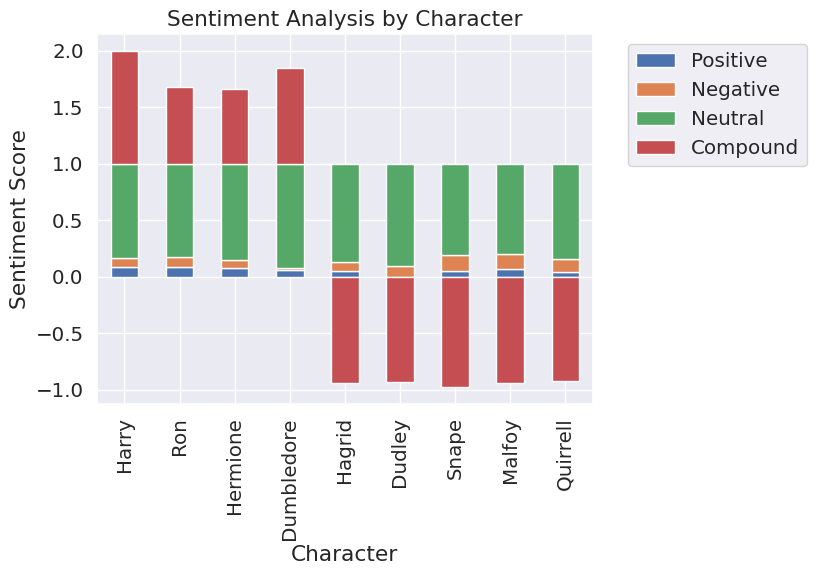

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

#데이터셋 불러오기
data_path = 'tweet_emotions.csv'

#데이터셋 읽기
df = pd.read_csv(data_path)

#대본 데이터 추출
dialogues = df['content'].tolist()

# 인물별 감정 분석 결과를 저장할 데이터프레임 생성
result_df = pd.DataFrame(columns=['Character', 'Positive', 'Negative', 'Neutral','Compound'])

# 인물별로 감정 분석 수행 및 결과 저장
if 'Character' in df.columns:  # 'Character' 열이 존재하는 경우에만 수행
    unique_characters = df['Character'].unique()  # 데이터셋에서 유일한 인물들을 가져옴

for character, dialogues in character_dialogues.items():
    # 대본 내 해당 인물의 대사를 합친 후 감정 분석 수행
    script = ' '.join(dialogues)
    sentiment_scores = analyzer.polarity_scores(script)

    # 결과를 데이터프레임에 추가
    result_df = result_df.append({'Character': character,
                                  'Positive': sentiment_scores['pos'],
                                  'Negative': sentiment_scores['neg'],
                                  'Neutral': sentiment_scores['neu'],
                                  'Compound': sentiment_scores['compound'],}
                                 , ignore_index=True)

# 결과 출력
print(result_df)

# 결과를 그래프로 시각화
result_df.set_index('Character').plot(kind='bar', stacked=True)
#result_df.set_index('Character')[['Positive', 'Negative', 'Neutral','Compound']].plot(kind='bar', stacked=True)
plt.xlabel('Character')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis by Character')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


 - 결과


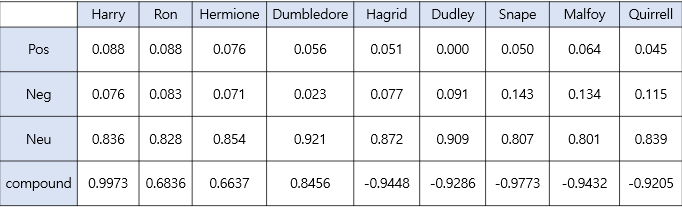

- 즉 harry, ron, hermione, dumbledore는 전반적으로 긍정적이거나 중립적인 감정을 나타내는 대사가 많은 편이다.

- 그러나 hagrid, dudley, snape, malfoy, quirrell은 부정적인 감정을 나타내는 대사가 더 많다.

- 전체 감정 평균인 'compound' 점수를 살펴보면, harry와 dumbledore는 상대적으로 높은 긍정적 감정 평균을 가지고 있다. 하지만 hagrid, dudley, snape, malfoy, quirrell은 상대적으로 높은 부정적인 감정 평균을 보여준다.

<CLIMAX 감정 분포도 분석>

- 대본의 절정(CLIMAX) 감정 분포도

In [ ]:
# 대본을 문장 단위로 분할
sentences = 대본.split('. ')  # 마침표와 공백을 기준으로 문장을 분할합니다. 만약 다른 문장 구분자가 사용된다면 그에 맞게 변경하세요.

# CLIMAX를 나타내는 특정한 패턴이나 단어를 찾기 위한 조건 설정
climax_keywords = ['CHESS ROOM', 'DARKNESS', 'bouquet']  # CLIMAX를 나타내는 가능한 키워드 목록을 설정합니다. 필요에 따라 더 추가할 수 있습니다.

# CLIMAX 찾기
climax_index = None
for i, sentence in enumerate(sentences):
    for keyword in climax_keywords:
        if keyword in sentence:
            climax_index = i
            break
    if climax_index is not None:
        break

# CLIMAX를 찾았을 경우 분할
if climax_index is not None:
    climax_before = '. '.join(sentences[:climax_index + 1])
    climax_after = '. '.join(sentences[climax_index + 1:])
else:
    print("CLIMAX를 찾지 못했습니다.")

# 감정 분석 수행 및 결과 출력 등 추가 작업 수행

- 감정 분석 결과 딕셔너리

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# 감정 분석기 초기화
sia = SentimentIntensityAnalyzer()

# CLIMAX를 나타내는 특정한 패턴이나 단어를 찾기 위한 조건 설정
climax_keywords = ['CHESS ROOM', 'DARKNESS', 'bouquet']

# CLIMAX 키워드를 찾아 인덱스 구하기
climax_index = None
for i, sentence in enumerate(sentences):
    for keyword in climax_keywords:
        if keyword in sentence:
            climax_index = i
            break
    if climax_index is not None:
        break

# CLIMAX를 찾았을 경우 분할 및 감정 분석 수행
if climax_index is not None:
    climax_before = '. '.join(sentences[:climax_index])
    climax_after = '. '.join(sentences[climax_index:])

    # 감정 분석 수행 및 결과 딕셔너리 구성
    sentiment_result = {}
    sentiment_result['Climax before'] = sia.polarity_scores(climax_before)['compound']
    sentiment_result['Climax after'] = sia.polarity_scores(climax_after)['compound']
else:
    print("CLIMAX를 찾지 못했습니다.")

# 감정 분석 결과 출력
print(sentiment_result)

{'Climax before': 0.9997, 'Climax after': 0.8757}


- climax 이전과 이후의 감정 분석

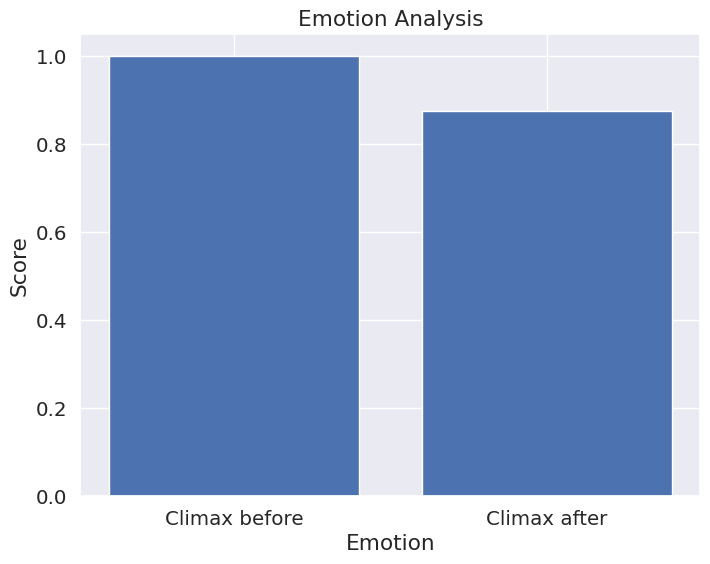

In [ ]:
import matplotlib.pyplot as plt

# 감정 분석 결과 딕셔너리
sentiment_result = {
    'Climax before': 0.9997,
    'Climax after': 0.8757
}

# 그래프 데이터 준비
emotions = list(sentiment_result.keys())
scores = list(sentiment_result.values())

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(emotions, scores) # 각각의 감정 상태및 점수
plt.xlabel('Emotion')
plt.ylabel('Score')
plt.title('Emotion Analysis')
plt.show() # 그래프 출력

- climax 이전과 이후의 상세 감정 분석(인물의 종합적 감정)
  -> 구체적 시각화

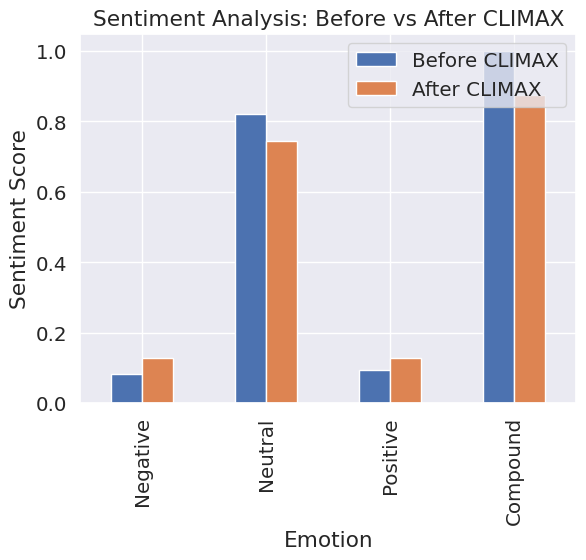

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

# 대본을 CLIMAX 이전과 이후로 분할
climax_index = 대본.index('CHESS ROOM')  # 'CLIMAX'라는 텍스트가 대본 어디에 위치해 있는지를 찾아 해당 인덱스를 구합니다.
climax_before = 대본[:climax_index]  # CLIMAX 이전 부분
climax_after = 대본[climax_index:]  # CLIMAX 이후 부분

# 감정 분석을 위한 초기화
analyzer = SentimentIntensityAnalyzer()

# 감정 분석 수행
before_scores = analyzer.polarity_scores(climax_before)
after_scores = analyzer.polarity_scores(climax_after)

# 결과를 데이터프레임에 저장
result_df = pd.DataFrame({
    'Emotion': ['Negative', 'Neutral', 'Positive', 'Compound'],
    'Before CLIMAX': [before_scores['neg'], before_scores['neu'], before_scores['pos'], before_scores['compound']],
    'After CLIMAX': [after_scores['neg'], after_scores['neu'], after_scores['pos'], after_scores['compound']]
})

# 결과를 그래프로 시각화
result_df = result_df.set_index('Emotion')
result_df.plot(kind='bar')
plt.xlabel('Emotion')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis: Before vs After CLIMAX')
plt.legend(loc='upper right')
plt.show()

- 인물의 종합적 감정 (더 구체적 비교 시각화)

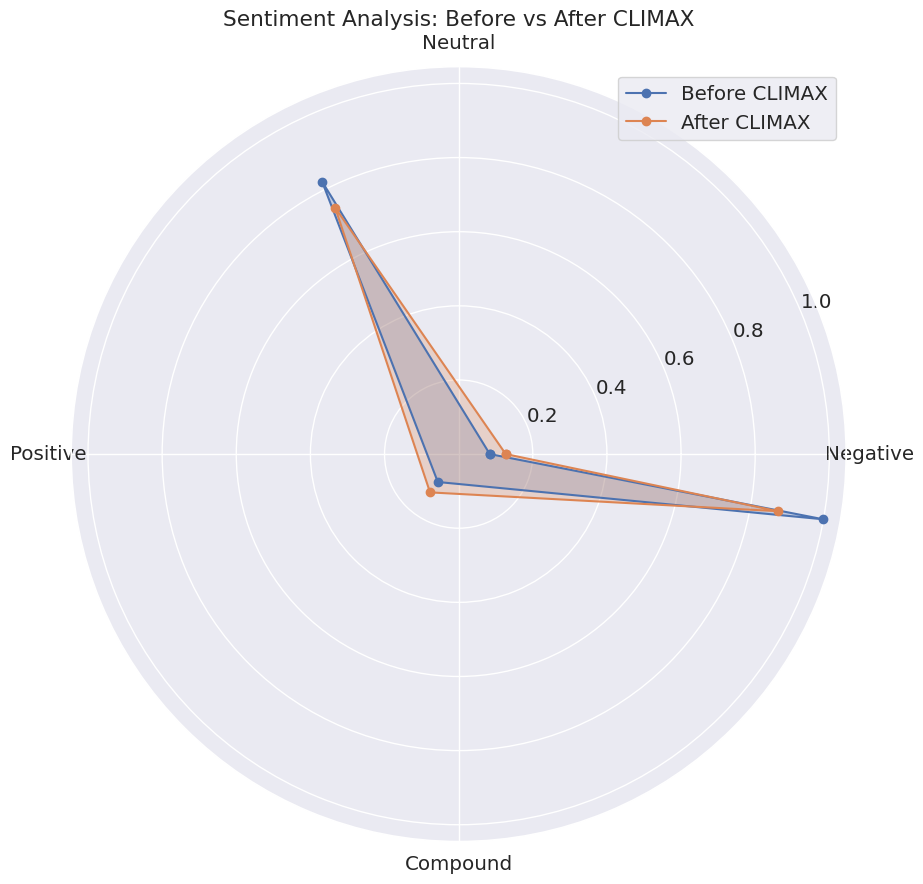

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 대본을 CLIMAX 이전과 이후로 분할
climax_index = 대본.index('CHESS ROOM')
climax_before = 대본[:climax_index]
climax_after = 대본[climax_index:]

# 감정 분석을 위한 초기화
analyzer = SentimentIntensityAnalyzer()

# 감정 분석 수행
before_scores = analyzer.polarity_scores(climax_before)
after_scores = analyzer.polarity_scores(climax_after)

# 결과를 데이터프레임에 저장
result_df = pd.DataFrame({
    'Emotion': ['Negative', 'Neutral', 'Positive', 'Compound'],
    'Before CLIMAX': [before_scores['neg'], before_scores['neu'], before_scores['pos'], before_scores['compound']],
    'After CLIMAX': [after_scores['neg'], after_scores['neu'], after_scores['pos'], after_scores['compound']]
})

# 방사형 그래프로 시각화
categories = result_df['Emotion']
before_scores = result_df['Before CLIMAX']
after_scores = result_df['After CLIMAX']

fig, ax = plt.subplots(figsize=(10, 12), subplot_kw=dict(polar=True))
lines, labels = plt.thetagrids(range(0, 360, int(360/len(categories))), labels=categories)
plt.plot(list(range(0, 360, int(360/len(categories))))+[0], before_scores.tolist()+[before_scores[0]], 'o-')
plt.plot(list(range(0, 360, int(360/len(categories))))+[0], after_scores.tolist()+[after_scores[0]], 'o-')
plt.fill(list(range(0, 360, int(360/len(categories))))+[0], before_scores.tolist()+[before_scores[0]], alpha=0.25)
plt.fill(list(range(0, 360, int(360/len(categories))))+[0], after_scores.tolist()+[after_scores[0]], alpha=0.25)
plt.legend(['Before CLIMAX', 'After CLIMAX'], loc='upper right')
plt.title('Sentiment Analysis: Before vs After CLIMAX')

plt.show()


- 인물 개인의 climax 이전과 이후의 감정

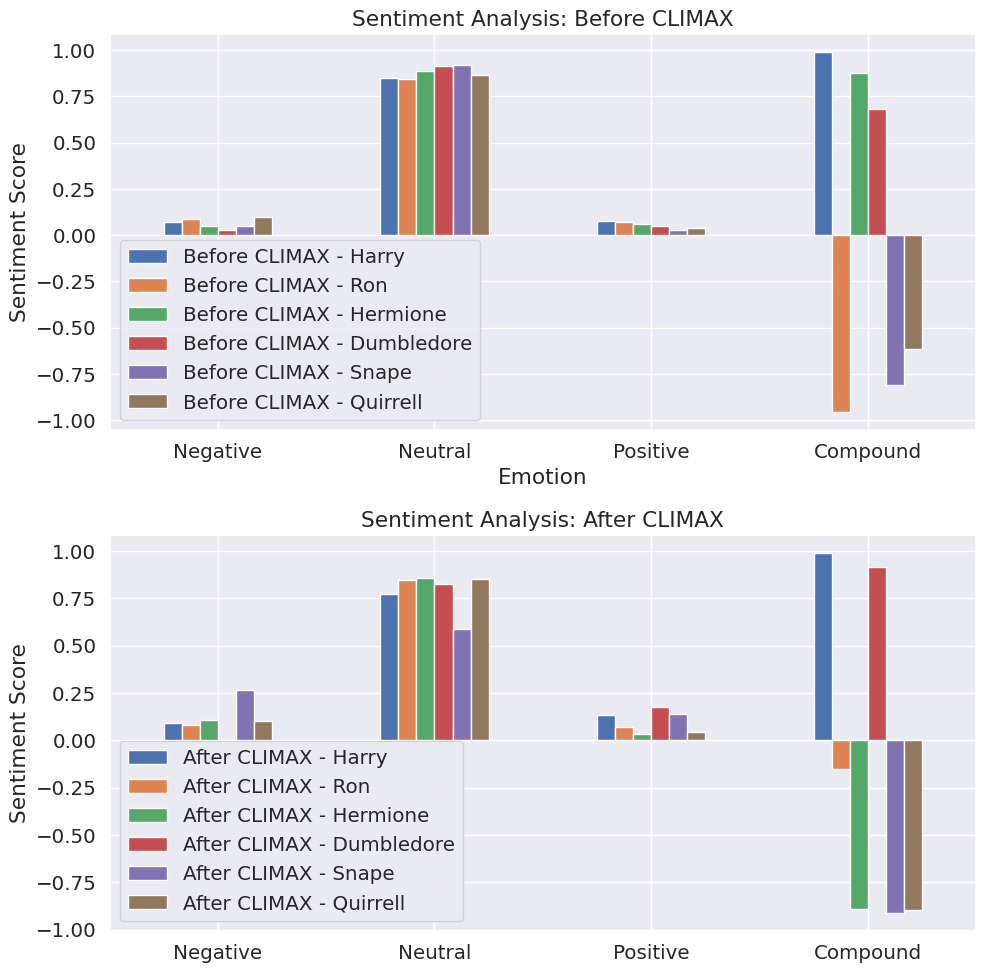

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

# 대본을 CLIMAX 이전과 이후로 분할
climax_index = 대본.index('CHESS ROOM')
climax_before = 대본[:climax_index]
climax_after = 대본[climax_index:]

# 감정 분석을 위한 초기화
analyzer = SentimentIntensityAnalyzer()

# 대본에서 'Harry', 'Ron', 'Hermione' 대사 추출
harry_lines = [line for line in climax_before.split('\n') if 'Harry' in line]
ron_lines = [line for line in climax_before.split('\n') if 'Ron' in line]
hermione_lines = [line for line in climax_before.split('\n') if 'Hermione' in line]
dumbledore_lines = [line for line in climax_before.split('\n') if 'Dumbledore' in line]
snape_lines = [line for line in climax_before.split('\n') if 'Snape' in line]
quirrell_lines = [line for line in climax_before.split('\n') if 'Quirrell' in line]

# 각 인물의 대사에 대한 감정 분석 수행
harry_scores = analyzer.polarity_scores(' '.join(harry_lines))
ron_scores = analyzer.polarity_scores(' '.join(ron_lines))
hermione_scores = analyzer.polarity_scores(' '.join(hermione_lines))
dumbledore_scores = analyzer.polarity_scores(' '.join(dumbledore_lines))
snape_scores = analyzer.polarity_scores(' '.join(snape_lines))
quirrell_scores = analyzer.polarity_scores(' '.join(quirrell_lines))

# 결과를 데이터프레임에 저장
result_df = pd.DataFrame({
    'Emotion': ['Negative', 'Neutral', 'Positive', 'Compound'],
    'Before CLIMAX - Harry': [harry_scores['neg'], harry_scores['neu'], harry_scores['pos'], harry_scores['compound']],
    'Before CLIMAX - Ron': [ron_scores['neg'], ron_scores['neu'], ron_scores['pos'], ron_scores['compound']],
    'Before CLIMAX - Hermione': [hermione_scores['neg'], hermione_scores['neu'], hermione_scores['pos'], hermione_scores['compound']],
    'Before CLIMAX - Dumbledore': [dumbledore_scores['neg'], dumbledore_scores['neu'], dumbledore_scores['pos'], dumbledore_scores['compound']],
    'Before CLIMAX - Snape': [snape_scores['neg'], snape_scores['neu'], snape_scores['pos'], snape_scores['compound']],
    'Before CLIMAX - Quirrell': [quirrell_scores['neg'], quirrell_scores['neu'], quirrell_scores['pos'], quirrell_scores['compound']],
})

# 대본에서 'Harry', 'Ron', 'Hermione' 대사 추출
harry_lines = [line for line in climax_after.split('\n') if 'Harry' in line]
ron_lines = [line for line in climax_after.split('\n') if 'Ron' in line]
hermione_lines = [line for line in climax_after.split('\n') if 'Hermione' in line]
dumbledore_lines = [line for line in climax_after.split('\n') if 'Dumbledore' in line]
snape_lines = [line for line in climax_after.split('\n') if 'Snape' in line]
quirrell_lines = [line for line in climax_after.split('\n') if 'Quirrell' in line]

# 각 인물의 대사에 대한 감정 분석 수행
harry_scores = analyzer.polarity_scores(' '.join(harry_lines))
ron_scores = analyzer.polarity_scores(' '.join(ron_lines))
hermione_scores = analyzer.polarity_scores(' '.join(hermione_lines))
dumbledore_scores = analyzer.polarity_scores(' '.join(dumbledore_lines))
snape_scores = analyzer.polarity_scores(' '.join(snape_lines))
quirrell_scores = analyzer.polarity_scores(' '.join(quirrell_lines))

# 결과를 데이터프레임에 추가
result_df['After CLIMAX - Harry'] = [harry_scores['neg'], harry_scores['neu'], harry_scores['pos'], harry_scores['compound']]
result_df['After CLIMAX - Ron'] = [ron_scores['neg'], ron_scores['neu'], ron_scores['pos'], ron_scores['compound']]
result_df['After CLIMAX - Hermione'] = [hermione_scores['neg'], hermione_scores['neu'], hermione_scores['pos'], hermione_scores['compound']]
result_df['After CLIMAX - Dumbledore'] = [dumbledore_scores['neg'], dumbledore_scores['neu'], dumbledore_scores['pos'], dumbledore_scores['compound']]
result_df['After CLIMAX - Snape'] = [snape_scores['neg'], snape_scores['neu'], snape_scores['pos'], snape_scores['compound']]
result_df['After CLIMAX - Quirrell'] = [quirrell_scores['neg'],quirrell_scores['neu'], quirrell_scores['pos'],quirrell_scores['compound']]

# 결과 그래프 그리기
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# 이전 CLIMAX 감정 결과 막대 그래프
result_df.iloc[:, 1:7].plot(kind='bar', ax=ax1, rot=0)
ax1.set_xlabel('Emotion')
ax1.set_ylabel('Sentiment Score')
ax1.set_title('Sentiment Analysis: Before CLIMAX')
ax1.set_xticklabels(result_df['Emotion'])

# 이후 CLIMAX 감정 결과 막대 그래프
result_df.iloc[:, 7:].plot(kind='bar', ax=ax2, rot=0)
ax1.set_xlabel('Emotion')
ax2.set_ylabel('Sentiment Score')
ax2.set_title('Sentiment Analysis: After CLIMAX')
ax2.set_xticklabels(result_df['Emotion'])

# 그래프 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

-> 위의 기준 : HARRY가 Quirrell의 얼굴이 변하기 전의 모습

#성능 평가#

- 실제값과 예측값 구하기

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 테스트 데이터에 대한 예측을 수행합니다.
y_pred = model.predict(X_test)

# 정확도를 계산합니다.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 정밀도를 계산합니다.
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# 재현율을 계산합니다.
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# F1 점수를 계산합니다.
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

Accuracy: 0.9863588667366212
Precision: 0.9923529411764707
Recall: 0.9439655172413793
F1 Score: 0.9664666412236469


<모델 예측 결과>
- 정확도 : 0.986

- 정밀도 : 0.992

- 재현율 : 0.944

- F1 점수 : 0.966

=> 이는 모델이 대부분 샘플을 정확하게 분류하였고, 양성 샘플에 대해서도 높은 정확도를 보였음을 예측하였다.

<성능평가>
사람 평가: 사람들이 수동으로 라벨을 부여하여 VADER의 예측 결과와 비교하는 방식으로, 미리 정의된 텍스트 데이터셋을 이용하여 사람들이 감성을 평가하고, VADER의 예측 결과와 비교하여 정확도, 정밀도, 재현율 등의 지표를 계산한다.
이를 통해 VADER의 예측 정확도를 평가할 수 있습니다.

#최종 정리#

<정리>
 - 감정은 서사 생성과 인물에 대해 이해하는데 있어서 굉장히 중요한 역할을 한다고 생각한다.

<감정 분석 모델>
 - 본 프로젝트는 VADER 감정 분석모델을 기반으로 총 13가지의 감정 표현을 분석하였다. VADER는 NLTK 라이브러리의 SentimentIntensityAnalyzer 클래스에서 제공되는 모델로 현재 내가 업로드한 해리포터 영어 텍스트(대본)의 감정을 분석하기 위해 개발되었다.

 - 이 모델은 각 단어의 감정 점수를 계산하고 문장 전체의 감정 점수를 결합해서 긍정적인 감정, 부정적인 감정, 중립적인 감정을 판단한다. VADER 모델은 감정 단어의 강도, 부정 단어의 부정성, 감정 단어와 부정 단어의 상호작용 등을 고려해서 감정을 평가한다.

<머신러닝 모델>
 - 로지스틱 회귀 (Logistic Regression): sklearn.linear_model.LogisticRegression 클래스를 사용하여 로지스틱 회귀 모델을 훈련했다. 로지스틱 회귀는 이진 분류 모델로, 입력 특성과 이진 분류 레이블 사이의 관계를 학습하는 데 사용된다.

